In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Download\Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.groupby("type")["isFraud"].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

In [5]:
df.shape

(6362620, 11)

In [6]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# find out null value

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#  EDA

# df["amount"] column find out outlier

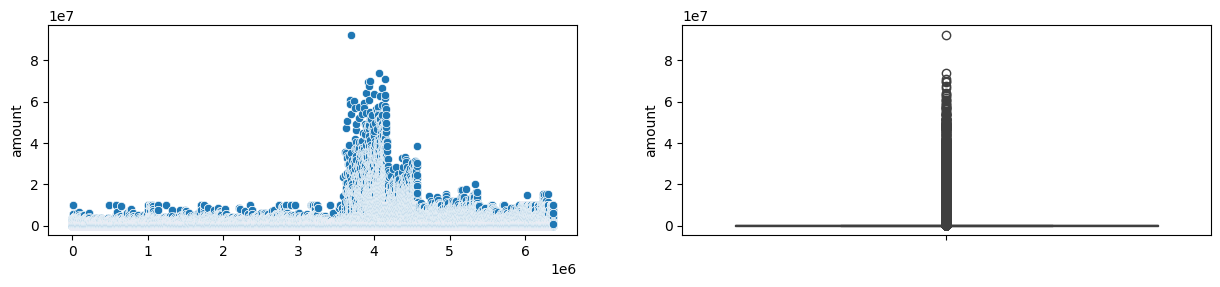

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot(df["amount"])
plt.subplot(2,2,2)
sns.boxplot(df["amount"])
plt.show()

In [13]:
Q1=df["amount"].quantile(0.25)
Q3=df["amount"].quantile(0.75)
Q1,Q3

(np.float64(13389.57), np.float64(208721.4775))

In [14]:
IQR=Q3-Q1
IQR

np.float64(195331.9075)

In [15]:
max_limit=Q3+1.5*IQR
min_limit=Q1-1.5*IQR
print("max_limit",max_limit),print("min_limit",min_limit)

max_limit 501719.33875
min_limit -279608.29125


(None, None)

In [16]:
new_df=df[(df["amount"]<=max_limit) & (df["amount"]>=min_limit)]

In [17]:
new_df.shape,df.shape

((6024542, 11), (6362620, 11))

# df["amount"] column after remove outlier

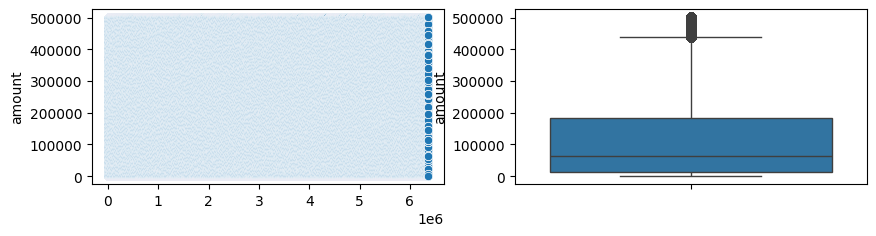

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.scatterplot(new_df["amount"])
plt.subplot(2,2,2)
sns.boxplot(new_df["amount"])
plt.show()

In [19]:
df=df[(df["amount"]<=max_limit) & (df["amount"]>=min_limit)]

# df["oldbalanceOrg"] column find out outlier

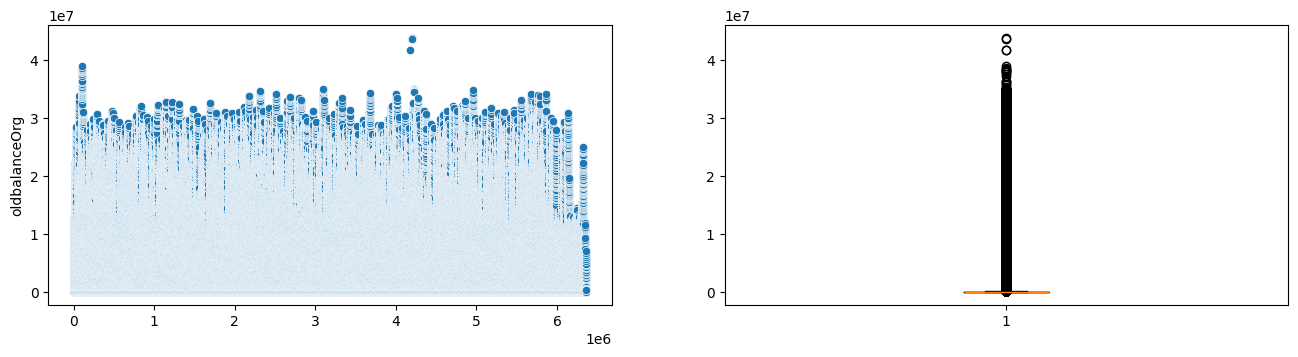

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(df["oldbalanceOrg"])
plt.subplot(2,2,2)
plt.boxplot(df["oldbalanceOrg"])
plt.show()

In [21]:
Q1=df["oldbalanceOrg"].quantile(0.25)
Q3=df["oldbalanceOrg"].quantile(0.75)
Q1,Q3

(np.float64(0.0), np.float64(113438.0))

In [22]:
IQR=Q3-Q1
IQR

np.float64(113438.0)

In [23]:
max_limit1=Q3+1.5*IQR
min_limit1=Q1-1.5*IQR
print("max_limit1",max_limit1),print("min_limit1",min_limit1)

max_limit1 283595.0
min_limit1 -170157.0


(None, None)

In [24]:
new_df1=df[(df["oldbalanceOrg"]<=max_limit1) & (df["oldbalanceOrg"]>=min_limit1)]

# df["oldbalanceOrg"] column after remove outlier

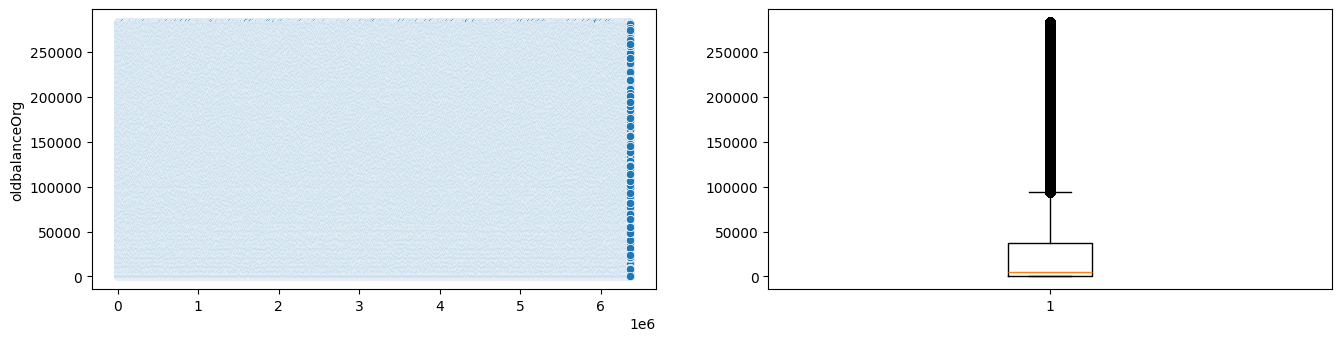

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(new_df1["oldbalanceOrg"])
plt.subplot(2,2,2)
plt.boxplot(new_df1["oldbalanceOrg"])
plt.show()

In [26]:
df=df[(df["oldbalanceOrg"]<=max_limit1) & (df["oldbalanceOrg"]>=min_limit1)]

In [27]:
df["oldbalanceOrg"].shape

(4963379,)

# df["newbalanceOrig"] column find out outlier

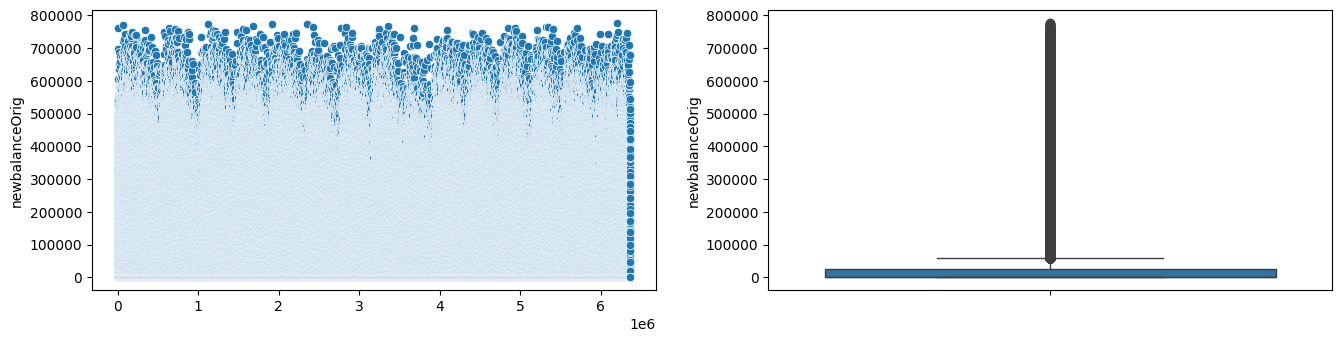

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(df["newbalanceOrig"])
plt.subplot(2,2,2)
sns.boxplot(df["newbalanceOrig"])
plt.show()

In [29]:
Q1=df["newbalanceOrig"].quantile(0.25)
Q3=df["newbalanceOrig"].quantile(0.75)
Q1,Q3

(np.float64(0.0), np.float64(24167.975))

In [30]:
IQR=Q3-Q1
IQR

np.float64(24167.975)

In [31]:
max_limit2=Q3+1.5*IQR
min_limit2=Q1-1.5*IQR
print("max_limit2",max_limit2),print("min_limit2",min_limit2)

max_limit2 60419.93749999999
min_limit2 -36251.962499999994


(None, None)

In [32]:
new_df2=df[(df["newbalanceOrig"]<=max_limit2) & (df["newbalanceOrig"]>=min_limit2)]

# df["newbalanceOrig"] after remove outlier

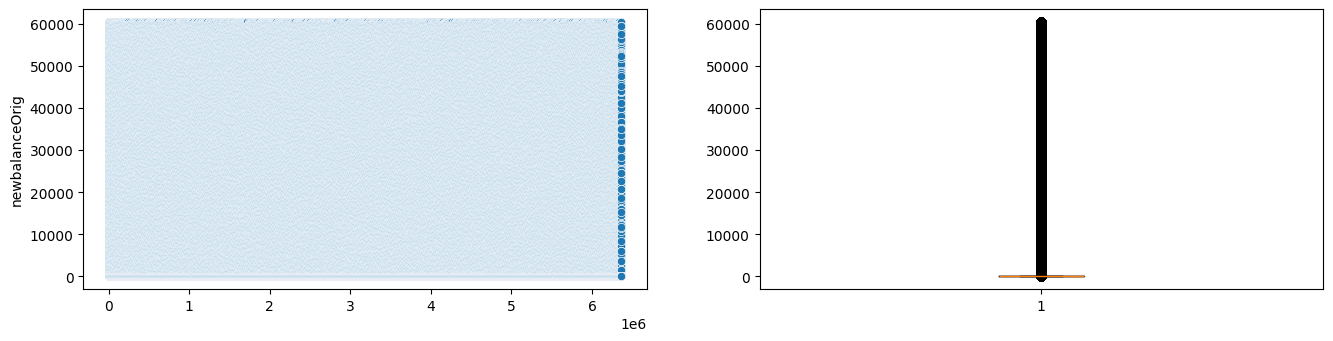

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(new_df2["newbalanceOrig"])
plt.subplot(2,2,2)
plt.boxplot(new_df2["newbalanceOrig"])
plt.show()

In [34]:
new_df2["newbalanceOrig"].shape,df["newbalanceOrig"].shape

((4039718,), (4963379,))

In [35]:
df=df[(df["newbalanceOrig"]<=max_limit2) & (df["newbalanceOrig"]>=min_limit2)]

# df["oldbalanceDest"] column find out outlier

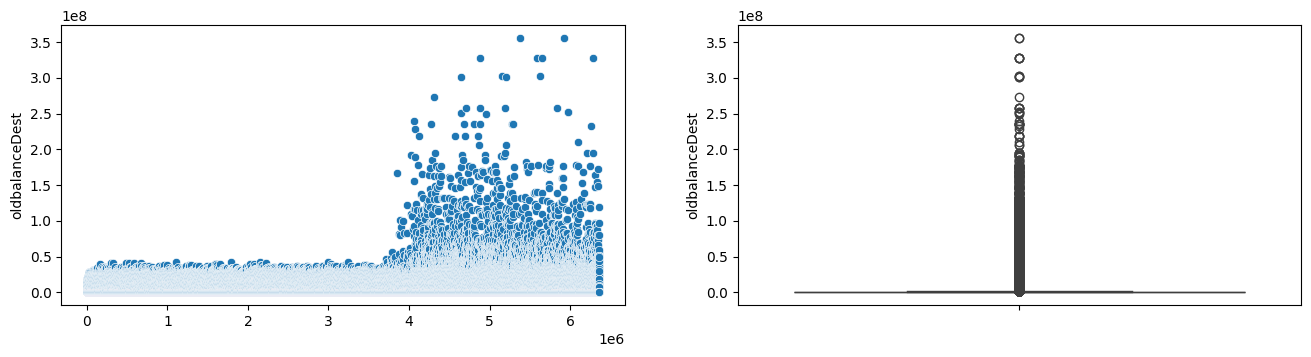

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(df["oldbalanceDest"])
plt.subplot(2,2,2)
sns.boxplot(df["oldbalanceDest"])
plt.show()

In [37]:
Q1=df["oldbalanceDest"].quantile(0.25)
Q3=df["oldbalanceDest"].quantile(0.75)
Q1,Q3

(np.float64(0.0), np.float64(697214.7975))

In [38]:
IQR=Q3-Q1
IQR

np.float64(697214.7975)

In [39]:
max_limit3=Q3+1.5*IQR
min_limit3=Q1-1.5*IQR
print("max_limit3",max_limit3),print("min_limit3",min_limit3)

max_limit3 1743036.99375
min_limit3 -1045822.19625


(None, None)

In [40]:
new_df3=df[(df["oldbalanceDest"]<=max_limit3) & (df["oldbalanceDest"]>=min_limit3)]

# df["oldbalanceDest"] after remove outlier

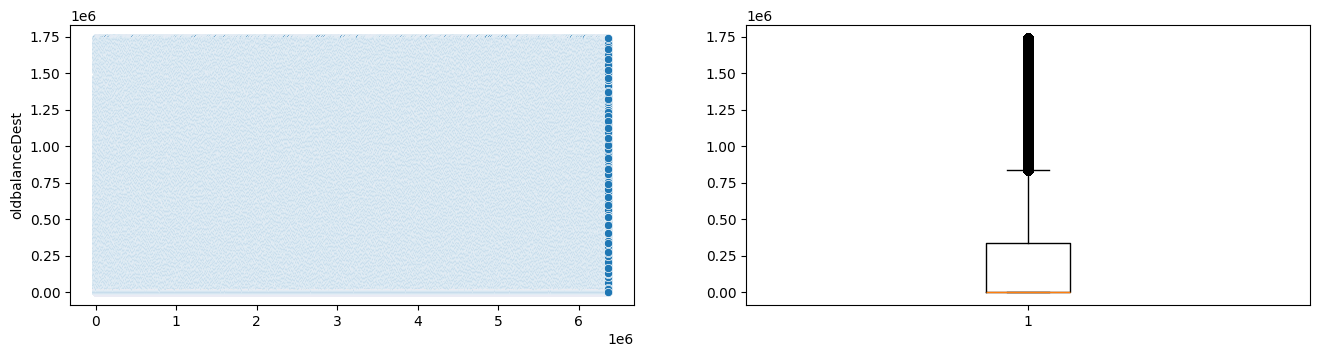

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(new_df3["oldbalanceDest"])
plt.subplot(2,2,2)
plt.boxplot(new_df3["oldbalanceDest"])
plt.show()

In [42]:
new_df3["oldbalanceDest"].shape

(3504063,)

In [43]:
df=df[(df["oldbalanceDest"]<=max_limit3) & (df["oldbalanceDest"]>=min_limit3)]

# df["newbalanceDest"] find out outlier

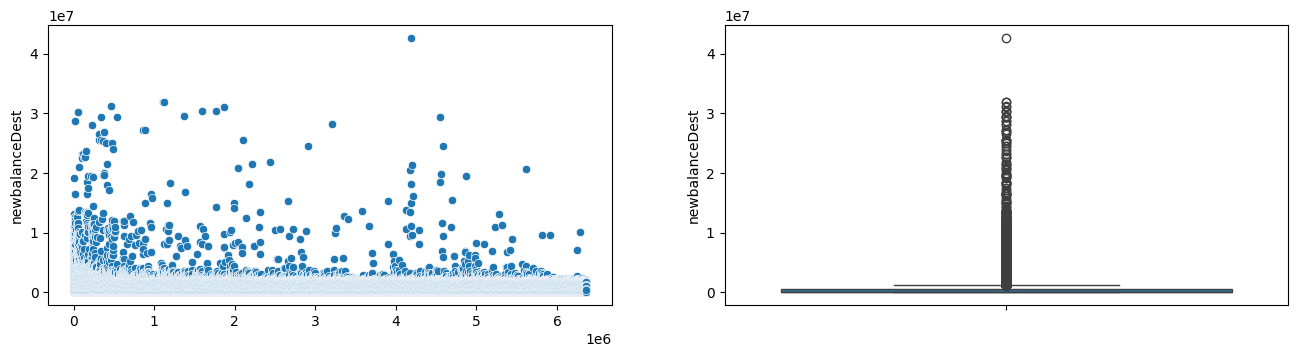

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(df["newbalanceDest"])
plt.subplot(2,2,2)
sns.boxplot(df["newbalanceDest"])
plt.show()

In [45]:
Q1=df["newbalanceDest"].quantile(0.25)
Q3=df["newbalanceDest"].quantile(0.75)
Q1,Q3

(np.float64(0.0), np.float64(506369.14))

In [46]:
max_limit4=Q3+1.5*IQR
min_limit4=Q1-1.5*IQR
print("max_limit4",max_limit4),print("min_limit4",min_limit4)

max_limit4 1552191.3362500002
min_limit4 -1045822.19625


(None, None)

In [47]:
new_df4=df[(df["newbalanceDest"]<=max_limit4) & (df["newbalanceDest"]>=min_limit4)]

# df["newbalanceDest"] after remove outlier

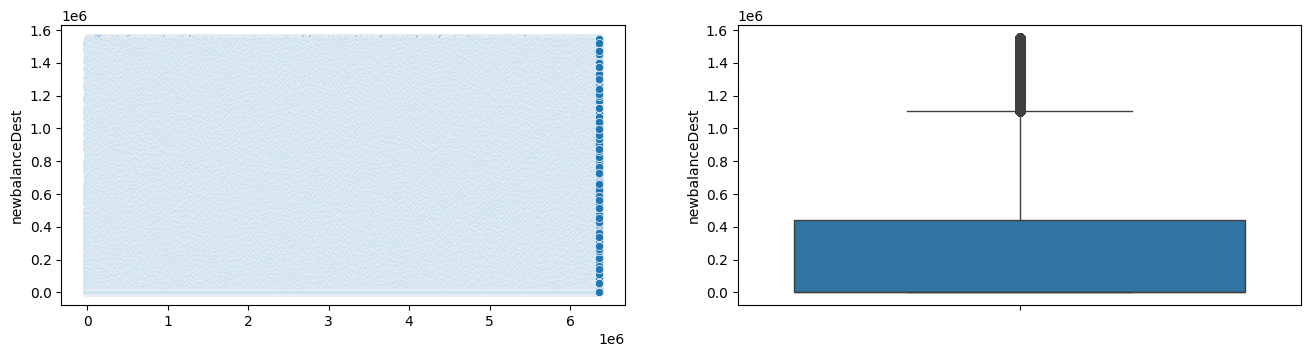

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.scatterplot(new_df4["newbalanceDest"])
plt.subplot(2,2,2)
sns.boxplot(new_df4["newbalanceDest"])
plt.show()

In [49]:
df=df[(df["newbalanceDest"]<=max_limit4) & (df["newbalanceDest"]>=min_limit4)]

# AFTER REMOVE OUTLIER 

In [50]:
df.shape

(3375047, 11)

In [51]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [52]:
df.drop(columns=["step","nameOrig","nameDest","isFlaggedFraud"],inplace=True)

# THE CLEAN DATASET FOR MODEL PREDICT

In [53]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
5,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0


In [54]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [55]:
import sklearn

# HERE "TYPE" COLUMN NEED  Preprocessing OrdinalEncoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
ORDINAL=OrdinalEncoder()

In [62]:
df["type"]=ORDINAL.fit_transform(df["type"].values.reshape(-1,1))


In [64]:
df["type"].values

array([3., 4., 1., ..., 1., 4., 1.])

In [65]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,3.0,1864.28,21249.0,19384.72,0.0,0.0,0
2,4.0,181.00,181.0,0.00,0.0,0.0,1
3,1.0,181.00,181.0,0.00,21182.0,0.0,1
4,3.0,11668.14,41554.0,29885.86,0.0,0.0,0
5,3.0,7817.71,53860.0,46042.29,0.0,0.0,0


# HERE FIND THE DATASET IN INPUT=X, OUTPUT=Y  

In [66]:
x=df.drop(columns=["isFraud"],axis=1)

In [67]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1,3.0,1864.28,21249.00,19384.72,0.00,0.00
2,4.0,181.00,181.00,0.00,0.00,0.00
3,1.0,181.00,181.00,0.00,21182.00,0.00
4,3.0,11668.14,41554.00,29885.86,0.00,0.00
5,3.0,7817.71,53860.00,46042.29,0.00,0.00
...,...,...,...,...,...,...
6362605,1.0,54652.46,54652.46,0.00,0.00,54652.46
6362608,4.0,258355.42,258355.42,0.00,0.00,0.00
6362609,1.0,258355.42,258355.42,0.00,25176.67,283532.09
6362610,4.0,63416.99,63416.99,0.00,0.00,0.00


In [68]:
y=df.iloc[:,-1]

In [69]:
y

1          0
2          1
3          1
4          0
5          0
          ..
6362605    1
6362608    1
6362609    1
6362610    1
6362611    1
Name: isFraud, Length: 3375047, dtype: int64

# NOW SPLIT THE DATA BASE ON X_TRAIN ,X_TEST,Y_TRAIN,Y_TEST

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
len(X_train)

2700037

In [73]:
len(X_test)

675010

# NOW APPLY StandardScaler 

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
Scaler=StandardScaler()

In [76]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [78]:
X_train

array([[-1.04132202,  0.53035052, -0.53183785, -0.40032328,  0.92350481,
         0.93145073],
       [ 0.80680296, -0.72243469,  1.57970261,  4.48041022, -0.58518021,
        -0.69515406],
       [ 0.80680296, -0.77734651,  0.97076625,  3.40734567, -0.58518021,
        -0.69515406],
       ...,
       [-1.04132202,  0.10170185, -0.33967968, -0.40032328, -0.0917371 ,
        -0.03361737],
       [ 0.80680296, -0.67890737, -0.49163508, -0.40032328, -0.58518021,
        -0.69515406],
       [-1.04132202,  0.12208453, -0.53183785, -0.40032328,  3.57560104,
         3.01926691]])

In [79]:
X_test

array([[-1.04132202, -0.55247561,  0.10612826, -0.40032328, -0.58268315,
        -0.62700059],
       [ 0.80680296, -0.73588326, -0.5150867 , -0.40032328, -0.58518021,
        -0.69515406],
       [-1.04132202,  0.13957798,  0.86068873, -0.40032328,  0.02408386,
         0.0733539 ],
       ...,
       [-1.04132202,  0.46093417, -0.53183785, -0.40032328, -0.07780572,
         0.0798048 ],
       [-1.04132202,  2.97327791, -0.53183785, -0.40032328,  2.20242864,
         2.68667966],
       [ 0.80680296, -0.6323362 , -0.53183785, -0.40032328, -0.58518021,
        -0.69515406]])

# find out sklearn_metrics

In [85]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

# FIND THE BEST MODEL PREDICT FOR CLASSIFICATION MODEL

In [90]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [91]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.35268070102665144
[[237457 436934]
 [    13    606]]
0.001385016227087809


In [93]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9990829765484955
[[674391      0]
 [   619      0]]
0.0


C:\Users\KAILASH\anaconda3\envs\python\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
